# EDA on Processed Bee Data Files

In the previous notebook. The data from each source was cleaned and saved to a folder under Data_Bees, processed_dfs. 

In this notebook I will conduct EDA on each of these data frames:
* bip_colony_loss_processed.csv
* state_census_processed.csv
* state_survey_processed.csv

Once the EDA on each source is complete, the data will be merged, using years. Further EDA will be performed on the merged data. The aim is to then merge the bee data with the air quality data and model the data.

In [44]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


### EDA on BIP Colony Loss

In [5]:
df_bip = pd.read_csv('./Data_Bees/processed_dfs/bip_colony_loss_processed.csv')
df_bip.drop(columns = ['Unnamed: 0'], inplace = True)
df_bip.head()

#data = pd.read_csv('./data/train.csv', index_col = 'Date', parse_dates = True)

,State,Total Winter All Loss,Beekeepers,Beekeepers Exclusive to State,Colonies,Colonies Exclusive to State,year
0,Maryland,0.076,14,1.000,4013,1.000,2007.0
1,Washington,0.137,5,0.000,21870,0.000,2007.0
2,New Jersey,0.151,15,0.800,22622,0.120,2007.0
3,Arkansas,0.174,20,1.000,16955,1.000,2007.0
4,Maine,0.180,6,0.167,45937,0.001,2007.0


In [7]:
pd.to_datetime(df_bip['year'])

0     1970-01-01 00:00:00.000002007
1     1970-01-01 00:00:00.000002007
2     1970-01-01 00:00:00.000002007
3     1970-01-01 00:00:00.000002007
4     1970-01-01 00:00:00.000002007
                   ...             
552   1970-01-01 00:00:00.000002018
553   1970-01-01 00:00:00.000002018
554   1970-01-01 00:00:00.000002018
555   1970-01-01 00:00:00.000002018
556   1970-01-01 00:00:00.000002018
Name: year, Length: 557, dtype: datetime64[ns]

In [8]:
df_bip.columns

Index(['State', 'Total Winter All Loss', 'Beekeepers',
       'Beekeepers Exclusive to State', 'Colonies',
       'Colonies Exclusive to State', 'year'],
      dtype='object')

In [9]:
df_bip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          556 non-null    object 
 1   Total Winter All Loss          557 non-null    float64
 2   Beekeepers                     557 non-null    int64  
 3   Beekeepers Exclusive to State  557 non-null    float64
 4   Colonies                       557 non-null    int64  
 5   Colonies Exclusive to State    557 non-null    float64
 6   year                           557 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 30.6+ KB


---
### Summary Statistics

In [10]:
df_bip.describe()

,Total Winter All Loss,Beekeepers,Beekeepers Exclusive to State,Colonies,Colonies Exclusive to State,year
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,0.308829,108.028725,0.852327,30835.125673,0.431287,2012.929982
std,0.134933,136.047849,0.221462,66271.315790,0.388373,3.232665
min,0.024000,5.000000,0.000000,19.000000,0.000000,2007.000000
25%,0.207000,24.000000,0.846000,1216.000000,0.050000,2010.000000
50%,0.286000,64.000000,0.938000,5311.000000,0.310000,2013.000000
75%,0.390000,139.000000,0.971000,24746.000000,0.871000,2016.000000
max,0.733000,1081.000000,1.000000,490737.000000,1.000000,2018.000000


<Axes: ylabel='Count'>

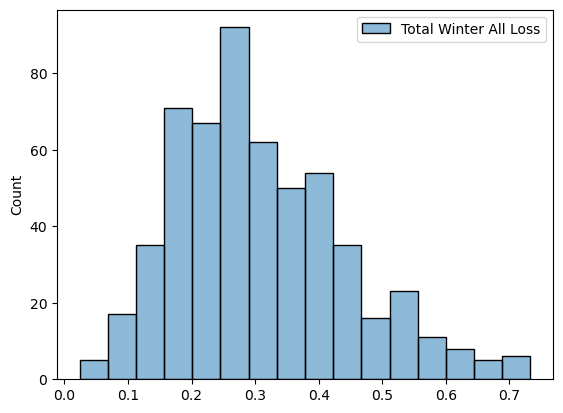

In [28]:
sns.histplot(data = df_bip[['Total Winter All Loss']])#, 'Beekeepers', 'Colonies']])

<Axes: ylabel='Count'>

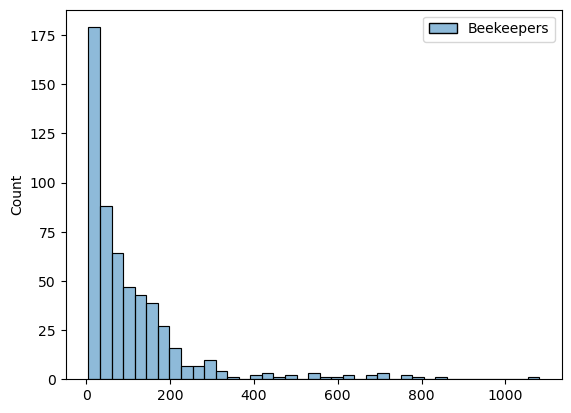

In [29]:
sns.histplot(data = df_bip[['Beekeepers']])

<Axes: ylabel='Count'>

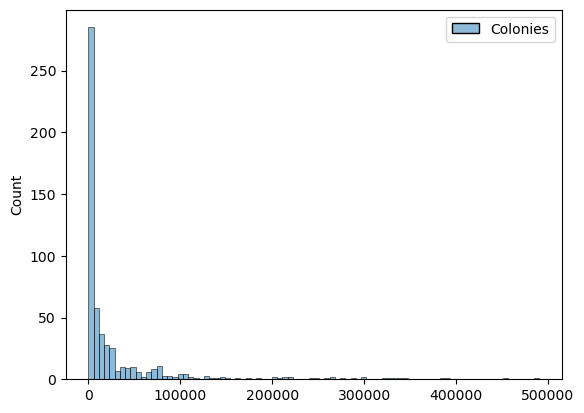

In [33]:
sns.histplot(data = df_bip[['Colonies']])

<Axes: >

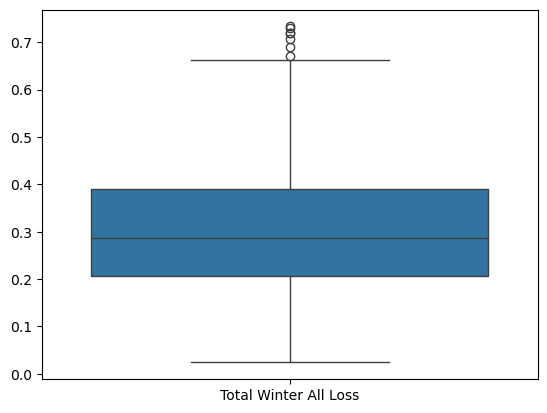

In [35]:
sns.boxplot(data = df_bip[['Total Winter All Loss']])

<Axes: >

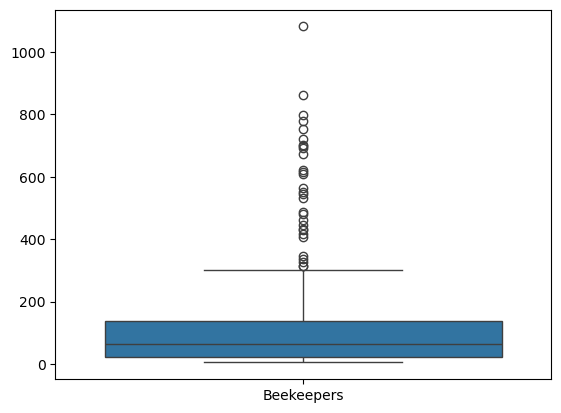

In [37]:
sns.boxplot(data = df_bip[['Beekeepers']])

<Axes: >

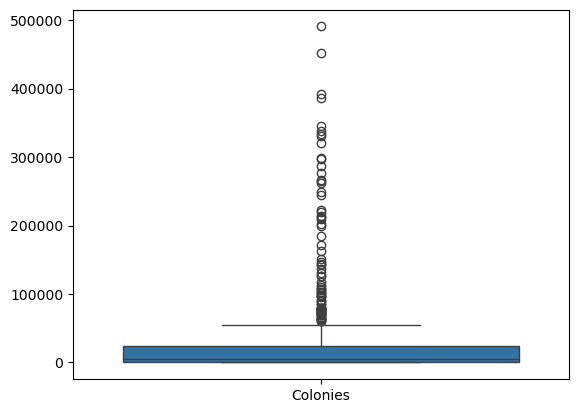

In [38]:
sns.boxplot(data = df_bip[['Colonies']])

Text(0.5, 1.0, 'Correlation Matrix')

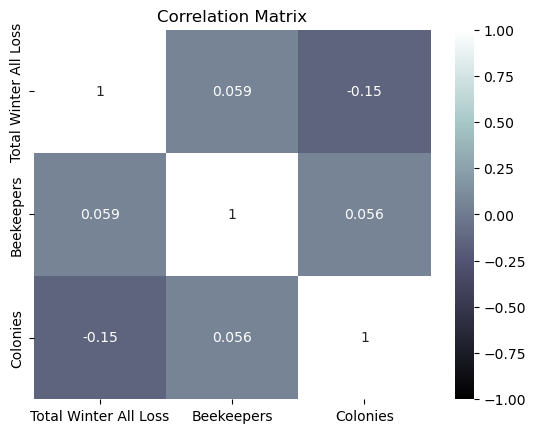

In [47]:
corr_matrix = df_bip[['Total Winter All Loss', 'Beekeepers', 'Colonies']].corr()

sns.heatmap(corr_matrix, annot = True, cmap = 'bone', vmax = 1, vmin = -1)
plt.title('Correlation Matrix')

### Decomposing the time series using seasonal_decompose from statsmodels
Plotting: trend, seasonal, and residual components

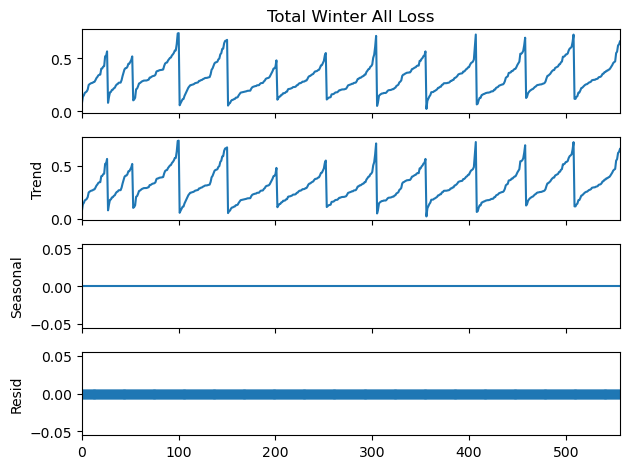

In [55]:
seasonal_decompose(df_bip['Total Winter All Loss'], period = 1).plot();
# defaults to additive model

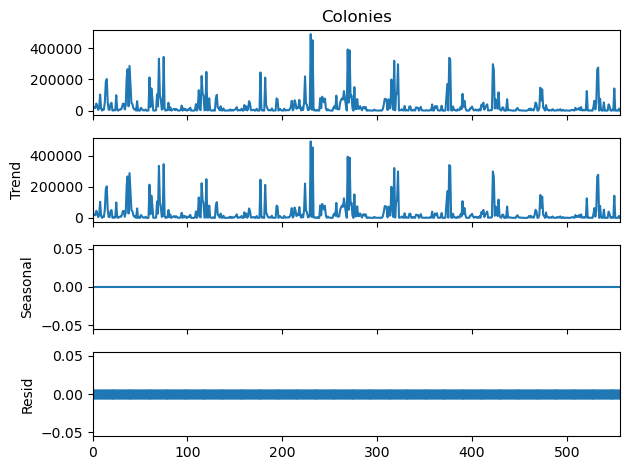

In [56]:
seasonal_decompose(df_bip['Colonies'], period = 1).plot();
# defaults to additive model

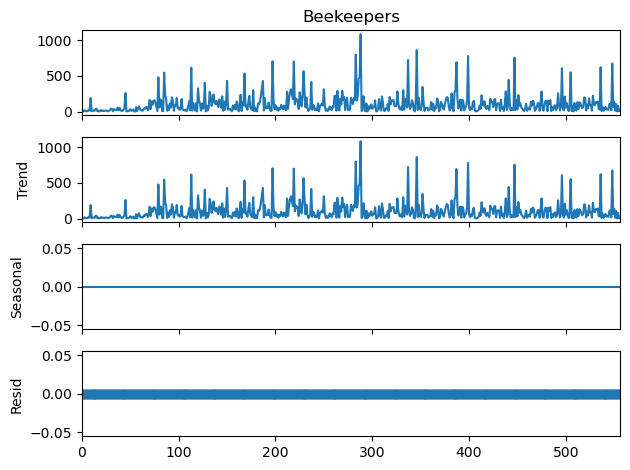

In [57]:
seasonal_decompose(df_bip['Beekeepers'], period = 1).plot();
# defaults to additive model

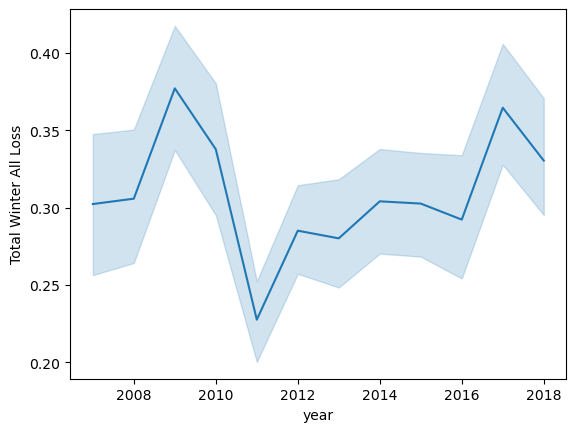

In [19]:
sns.lineplot(data = df_bip, x = 'year', y = 'Total Winter All Loss');

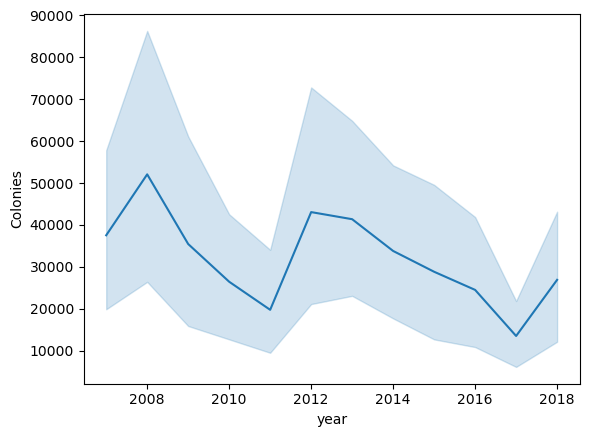

In [51]:
sns.lineplot(data = df_bip, x = 'year', y = 'Total Winter All Loss');

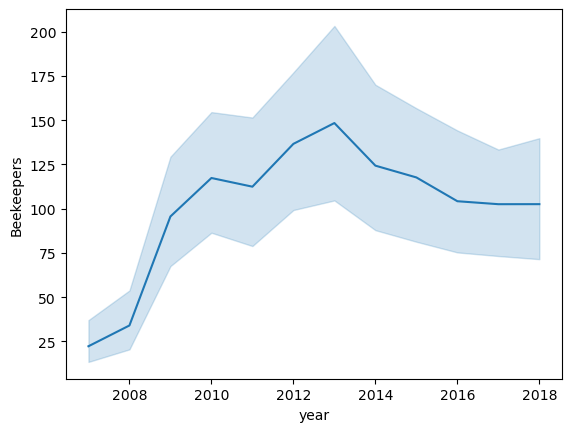

In [52]:
sns.lineplot(data = df_bip, x = 'year', y = 'Beekeepers');

*citation:* [StackOverflow]('https://stackoverflow.com/questions/62897548/why-am-i-getting-a-line-shadow-in-a-seaborn-line-plot#:~:text=By%20default%2C%20sns.,confidence%20interval%20of%20the%20estimate.')

There is line shadow showing the confidence interval, because the dataset contains multiple y values for each x value. By default, sns.lineplot() will estimate the mean by aggregating over multiple y values at each x value.
After aggregation, the mean of y values at each x value will be plotted as a line. The line shadow represents the 95% confidence interval of the estimate.

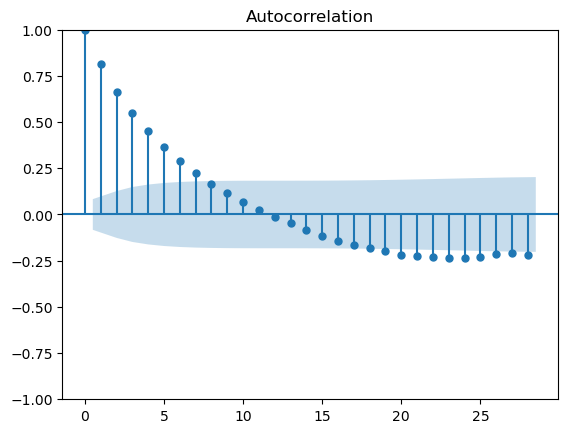

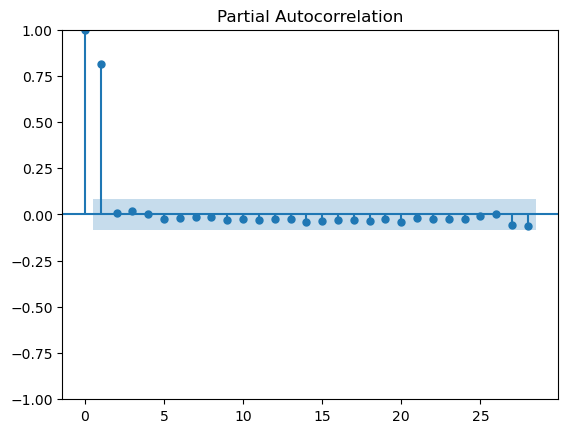

In [22]:
# Autocorrelation and partial autocorrelations plots
plot_acf(df_bip['Total Winter All Loss']);
plot_pacf(df_bip['Total Winter All Loss']);

In [ ]:
# time series forecasting?